# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [60]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [61]:
df.shape

(81937, 15)

In [62]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
#Each row is a dog including code, name, color and so on
#Animal Name is the dog's name, Animal Gender is the dog's gender.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [ ]:
#How many dogs are spayed?
#How many dogs'age above 5 ?
#How many the dogs are vaccinated?
#What's the percentage of vaccinated dogs per area?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [63]:
df['Primary Breed'].value_counts().head()

Unknown              12894
Yorkshire Terrier     5133
Shih Tzu              4727
Chihuahua             3924
Maltese               2965
Name: Primary Breed, dtype: int64

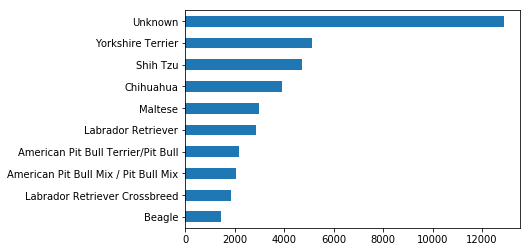

In [64]:
df['Primary Breed'].value_counts(ascending=True).tail(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

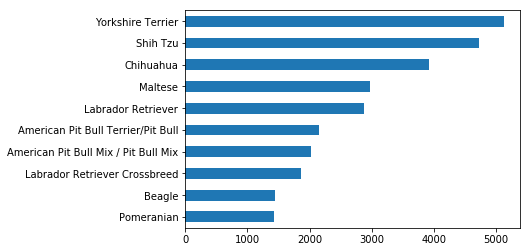

In [65]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts(ascending=True).tail(10).plot(kind='barh')

## What are the most popular dog names?

In [66]:
df[(df['Animal Name'] != 'Unknown' )& (df['Animal Name'] != 'UNKNOWN')]['Animal Name'].value_counts().head()

Bella      527
Max        515
Charlie    403
Lola       387
Rocky      354
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [67]:
df[df['Animal Name'] == 'yuqing']['Animal Name'].value_counts()

Series([], Name: Animal Name, dtype: int64)

In [68]:
df[df['Animal Name'] == 'Max']['Animal Name'].value_counts()

Max    515
Name: Animal Name, dtype: int64

In [69]:
df[df['Animal Name'] == 'Maxwell']['Animal Name'].value_counts()

Maxwell    30
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [70]:
df['Guard or Trained'].value_counts(normalize=True)['Yes'] * 100

0.1028723575923834

## What are the actual numbers?

In [71]:
df['Guard or Trained'].value_counts()

No     49525
Yes       51
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [72]:
df['Guard or Trained'].value_counts(dropna=False)

No     49525
NaN    32361
Yes       51
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [73]:
df['Guard or Trained'].fillna('No', inplace=True)

In [74]:
df['Guard or Trained'].value_counts(dropna=False)

No     81886
Yes       51
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [75]:
df[(df['Guard or Trained'] == 'Yes') & (df['Primary Breed'] != 'Unknown')]['Primary Breed'].value_counts()

German Shepherd Dog                     4
Labrador Retriever                      3
Chihuahua                               3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Staffordshire Bull Terrier              2
Shih Tzu                                2
Siberian Husky                          1
Yorkshire Terrier                       1
Doberman Pinscher                       1
Miniature Pinscher                      1
Poodle, Miniature                       1
Border Terrier                          1
Welsh Corgi, Pembroke                   1
Schnauzer, Miniature                    1
Jack Russell Terrier                    1
Shetland Sheepdog                       1
Golden Retriever                        1
Maltese                                 1
Boxer                                   1
Weimaraner                              1
Beagle Crossbreed                       1
Poodle, Toy                             1
Pekingese                         

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [76]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [77]:
df['age'] = 2017 - df['year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3


In [48]:
df['age'].mean()

7.3418480051747075

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [78]:
df_boro = pd.read_csv('zipcodes-neighborhoods.csv')

df_join = df.merge(df_boro, left_on='Owner Zip Code', right_on='zip')

df_join.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [79]:
df_join_bronx = df_join[df_join['borough'] == 'Bronx']
df_join_bronx['Animal Name'].value_counts().head()

Rocky       60
Max         56
Bella       54
Lucky       51
Princess    43
Name: Animal Name, dtype: int64

In [86]:
df_join[(df_join['borough'] == 'Brooklyn') & (df_join['Animal Name'] != 'Unknown')  & (df_join['Animal Name'] != 'unknown')& (df_join['Animal Name'] != 'UNKNOWN') & (df_join['Animal Name'] != 'NO NAME')]['Animal Name'].value_counts().head()

Max                      113
Bella                    112
Charlie                   96
Lola                      88
Dog Name Not Provided     84
Name: Animal Name, dtype: int64

In [81]:
df_join_ues = df_join[df_join['neighborhood'] == 'Upper East Side']
df_join_ues['Animal Name'].value_counts().head()

Lucy       40
Bella      31
Charlie    29
Coco       29
NO NAME    26
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [87]:
df_join[df_join['Primary Breed'] != 'Unknown'].groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)

neighborhood                   Primary Breed                     
Borough Park                   Yorkshire Terrier                     115
Bronx Park and Fordham         Yorkshire Terrier                      88
Bushwick and Williamsburg      Yorkshire Terrier                     135
Canarsie and Flatlands         Yorkshire Terrier                     137
Central Bronx                  Yorkshire Terrier                      82
Central Brooklyn               Shih Tzu                              113
Central Harlem                 Yorkshire Terrier                     132
Central Queens                 Yorkshire Terrier                      67
Chelsea and Clinton            Chihuahua                             210
East Harlem                    Yorkshire Terrier                     129
East New York and New Lots     American Pit Bull Terrier/Pit Bull     87
Flatbush                       Shih Tzu                               78
Gramercy Park and Murray Hill  Yorkshire Terrier          

## What breed of dogs are the least likely to be spayed? Male or female?

In [114]:
(df_join[df_join['Spayed or Neut'] == 'No']['Primary Breed'].value_counts() / df_join['Primary Breed'].value_counts()).sort_values().head(1)

Collie Crossbreed    0.02027
Name: Primary Breed, dtype: float64

In [116]:
(df_join[(df_join['Spayed or Neut'] == 'No') & (df_join['Animal Gender'] == 'M')]['Primary Breed'].value_counts() / df_join[df_join['Animal Gender'] == 'M']['Primary Breed'].value_counts()).sort_values().head(1)

Greyhound    0.026316
Name: Primary Breed, dtype: float64

In [117]:
(df_join[(df_join['Spayed or Neut'] == 'No') & (df_join['Animal Gender'] == 'F')]['Primary Breed'].value_counts() / df_join[df_join['Animal Gender'] == 'F']['Primary Breed'].value_counts()).sort_values().head(1)

Pointer    0.025
Name: Primary Breed, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [101]:
colors = ['black', 'white', 'grey']

In [102]:
domi_color = df_join[df_join['Animal Dominant Color'].str.lower().isin(colors)]

In [103]:
monochrome = domi_color[domi_color['Animal Secondary Color'].isnull()]

In [104]:
monochrome.shape

(10634, 20)

## How many dogs are in each borough? Plot it in a graph.

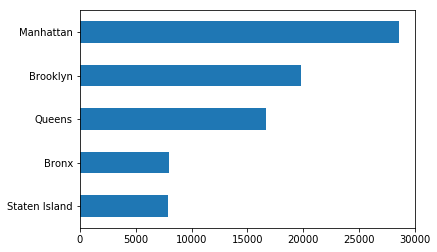

In [88]:
df_join['borough'].value_counts(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [90]:
df_bopo = pd.read_csv('boro_population.csv')

df_pop = df_join.merge(df_bopo, left_on='borough', right_on='borough')

df_pop.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan,1644518,23


In [96]:
df_pop['borough'].value_counts() / df_pop.groupby('borough')['population'].mean()

Bronx            0.005463
Brooklyn         0.007504
Manhattan        0.017352
Queens           0.007138
Staten Island    0.016626
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

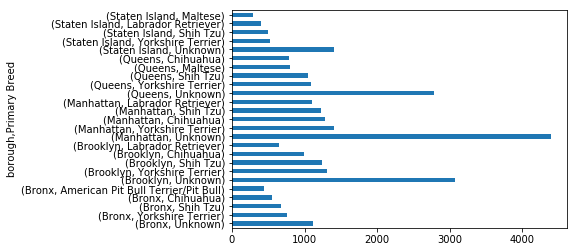

In [98]:
df_pop.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [99]:
df_pop['Guard or Trained'].value_counts(normalize=True)*100

No     99.939401
Yes     0.060599
Name: Guard or Trained, dtype: float64